### KNN Classifier

We provide `training` dataset points (features) and label (target).  
Next, we train the model using KNN classifier with `k=3` (nearest neighbors).  
Finally, we are able now to `predict` the label for a new (unknown) data point.   

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from icecream import ic

# Training dataset
X = [[0,0], 
     [1,1], 
     [2,2], 
     [3,3]]    
y = [0, 1, 0, 1]

# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Make predictions for unknown
x_unknown = [1,2]        
y_pred = knn.predict([x_unknown])  

ic(x_unknown)
ic(y_pred);

ic| x_unknown: [1, 2]
ic| y_pred: array([0])


### Data Frame

Fruts dataset contains heights, `widths` and labels (fruit name).  
We use pandas library to transform a `json` dataset into a DataFrame.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from icecream import ic

# Training dataset
data = {

  'height': [
    3.91, 7.09, 10.48, 9.21, 7.95, 7.62, 7.95, 4.69, 7.50, 7.11, 
    4.15, 7.29, 8.49, 7.44, 7.86, 3.93, 4.40, 5.5, 8.10, 8.69
  ], 

  'width': [
     5.76, 7.69, 7.32, 7.20, 5.90, 7.51, 5.32, 6.19, 5.99, 7.02, 
     5.60, 8.38, 6.52, 7.89, 7.60, 6.12, 5.90, 4.5, 6.15, 5.82
  ],
  
  'fruit': [
    'Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Apple', 'Mandarin', 
    'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 
    'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon', 'Lemon'
  ]
} 
# Transform dataset
df = pd.DataFrame(data) 
df = df.sort_values(by=['fruit', 'width', 'height'])

X = df[['height', 'width']].values
y = df.fruit.values

# Train the model
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X, y)

# Make predictions
unknown_item  = [9, 3]
unknown_items = [[9, 3], [4, 5], [2, 5], [8, 9], [5, 7]]

prediction  = knn.predict([unknown_item])
predictions = knn.predict(unknown_items)

ic(df)
ic(unknown_item, prediction)
ic(unknown_items, predictions);

ic| df:     height  width     fruit
        15    3.93   6.12     Apple
        9     7.11   7.02     Apple
        5     7.62   7.51     Apple
        14    7.86   7.60     Apple
        1     7.09   7.69     Apple
        13    7.44   7.89     Apple
        11    7.29   8.38     Apple
        17    5.50   4.50     Lemon
        19    8.69   5.82     Lemon
        4     7.95   5.90     Lemon
        8     7.50   5.99     Lemon
        18    8.10   6.15     Lemon
        12    8.49   6.52     Lemon
        3     9.21   7.20     Lemon
        2    10.48   7.32     Lemon
        6     7.95   5.32  Mandarin
        10    4.15   5.60  Mandarin
        0     3.91   5.76  Mandarin
        16    4.40   5.90  Mandarin
        7     4.69   6.19  Mandarin
ic| unknown_item: [9, 3], prediction: array(['Lemon'], dtype=object)
ic| unknown_items: [[9, 3], [4, 5], [2, 5], [8, 9], [5, 7]]
    predictions: array(['Lemon', 'Mandarin', 'Mandarin', 'Apple', 'Mandarin'], dtype=object)


### Model Evaluation

We split the dataset in two datasets, training and `test` and evaluate the model on both.  
The score is the `difference` between actual and predicted labels.  
A `score` of 1.0 means that the model correctly predicted all labels (100%).  

In [23]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from icecream import ic

# Training dataset
D1 = pd.DataFrame({

  'height': [
    3.91, 7.09, 10.48, 9.21, 7.95, 7.62, 7.95, 4.69, 7.50, 7.11, 
    4.15, 7.29, 8.49, 7.44, 7.86, 3.93, 4.40, 5.5, 8.10, 8.69
  ], 

  'width': [
     5.76, 7.69, 7.32, 7.20, 5.90, 7.51, 5.32, 6.19, 5.99, 7.02, 
     5.60, 8.38, 6.52, 7.89, 7.60, 6.12, 5.90, 4.5, 6.15, 5.82
  ],
  
  'fruit': [
    'Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Apple', 'Mandarin', 
    'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 
    'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon', 'Lemon'
  ]
})

# Test dataset
D2 = pd.DataFrame({
    'height': [4, 4.47, 6.49, 7.51, 8.34],
    'width':  [6.5, 7.13, 7, 5.01, 4.23],
    'fruit':  ['Mandarin', 'Mandarin', 'Apple', 'Lemon', 'Lemon']
})

# Features and labels
X1 = D1[['height', 'width']].values
y1 = D1.fruit.values
X2 = D2[['height', 'width']].values
y2 = D2.fruit.values

# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1, y1)

# Evaluate the model
predictions1 = knn.predict(X1)
predictions2 = knn.predict(X2)

score_on_training = metrics.accuracy_score(y1, predictions1)
score_on_test = metrics.accuracy_score(y2, predictions2)

ic(score_on_training)
ic(score_on_test);

ic| score_on_training: 0.85
ic| score_on_test: 1.0


### Score Graph

For this dataset the models with k between k=3 and k=7 perform `optimally` on the test set.  
In those cases, optimal balance between `overfitting` and underfitting.

ic| _k: 1, score1[i]: 100.0, score2[i]: 40.0
ic| _k: 2, score1[i]: 95.0, score2[i]: 60.0
ic| _k: 3, score1[i]: 85.0, score2[i]: 100.0
ic| _k: 4, score1[i]: 85.0, score2[i]: 100.0
ic| _k: 5, score1[i]: 85.0, score2[i]: 100.0
ic| _k: 6, score1[i]: 85.0, score2[i]: 100.0
ic| _k: 7, score1[i]: 85.0, score2[i]: 100.0
ic| _k: 8, score1[i]: 85.0, score2[i]: 100.0
ic| _k: 9, score1[i]: 85.0, score2[i]: 80.0
ic| _k: 10, score1[i]: 85.0, score2[i]: 60.0
ic| _k: 11, score1[i]: 80.0, score2[i]: 60.0
ic| _k: 12, score1[i]: 90.0, score2[i]: 60.0
ic| _k: 13, score1[i]: 65.0, score2[i]: 60.0
ic| _k: 14, score1[i]: 55.00000000000001, score2[i]: 60.0
ic| _k: 15, score1[i]: 55.00000000000001, score2[i]: 60.0
ic| _k: 16, score1[i]: 45.0, score2[i]: 60.0
ic| _k: 17, score1[i]: 50.0, score2[i]: 60.0
ic| _k: 18, score1[i]: 50.0, score2[i]: 60.0
ic| _k: 19, score1[i]: 40.0, score2[i]: 40.0
ic| _k: 20, score1[i]: 40.0, score2[i]: 40.0


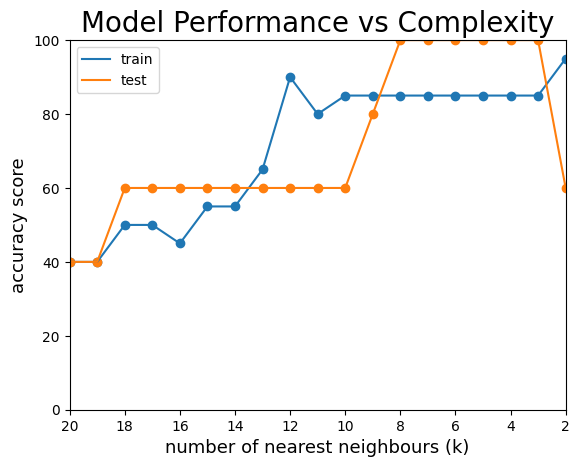

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from icecream import ic
import pandas as pd
import matplotlib.pyplot as plt

# Training dataset
D1 = pd.DataFrame({

  'height': [
    3.91, 7.09, 10.48, 9.21, 7.95, 7.62, 7.95, 4.69, 7.50, 7.11, 
    4.15, 7.29, 8.49, 7.44, 7.86, 3.93, 4.40, 5.5, 8.10, 8.69
  ], 

  'width': [
     5.76, 7.69, 7.32, 7.20, 5.90, 7.51, 5.32, 6.19, 5.99, 7.02, 
     5.60, 8.38, 6.52, 7.89, 7.60, 6.12, 5.90, 4.5, 6.15, 5.82
  ],
  
  'fruit': [
    'Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Apple', 'Mandarin', 
    'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 
    'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon', 'Lemon'
  ]
})

# Test dataset
D2 = pd.DataFrame({
    'height': [4, 4.47, 6.49, 7.51, 8.34],
    'width': [6.5, 7.13, 7, 5.01, 4.23],
    'fruit': ['Mandarin', 'Mandarin', 'Apple', 'Lemon', 'Lemon']
})

# Features and labels
X1 = D1[['height', 'width']].values
y1 = D1.fruit.values

X2 = D2[['height', 'width']].values
y2 = D2.fruit.values

# Initializa graph params
k = []
score1 = []
score2 = []

# Evaluate the score for different params
for i in range(len(X1)):
    _k = i+1
    
    clf = KNeighborsClassifier(n_neighbors = _k)
    clf.fit(X1, y1)

    _score1 = metrics.accuracy_score(y1, clf.predict(X1))
    _score2 = metrics.accuracy_score(y2, clf.predict(X2))

    k.append(_k)
    score1.append(_score1 * 100)
    score2.append(_score2 * 100)
    
    ic(_k, score1[i], score2[i])

# Plot train score
plt.scatter(k, score1) # function
plt.plot(k, score1, '-', label='train') # data points

# Plot test score
plt.scatter(k, score2)
plt.plot(k, score2, '-', label='test')

# Plot configurations
plt.axis([max(k),min(k)+1, 0, 100])
plt.xlabel('number of nearest neighbours (k)', size = 13)
plt.ylabel('accuracy score', size = 13)
plt.title('Model Performance vs Complexity', size = 20)
plt.legend()

# Output
plt.show()
